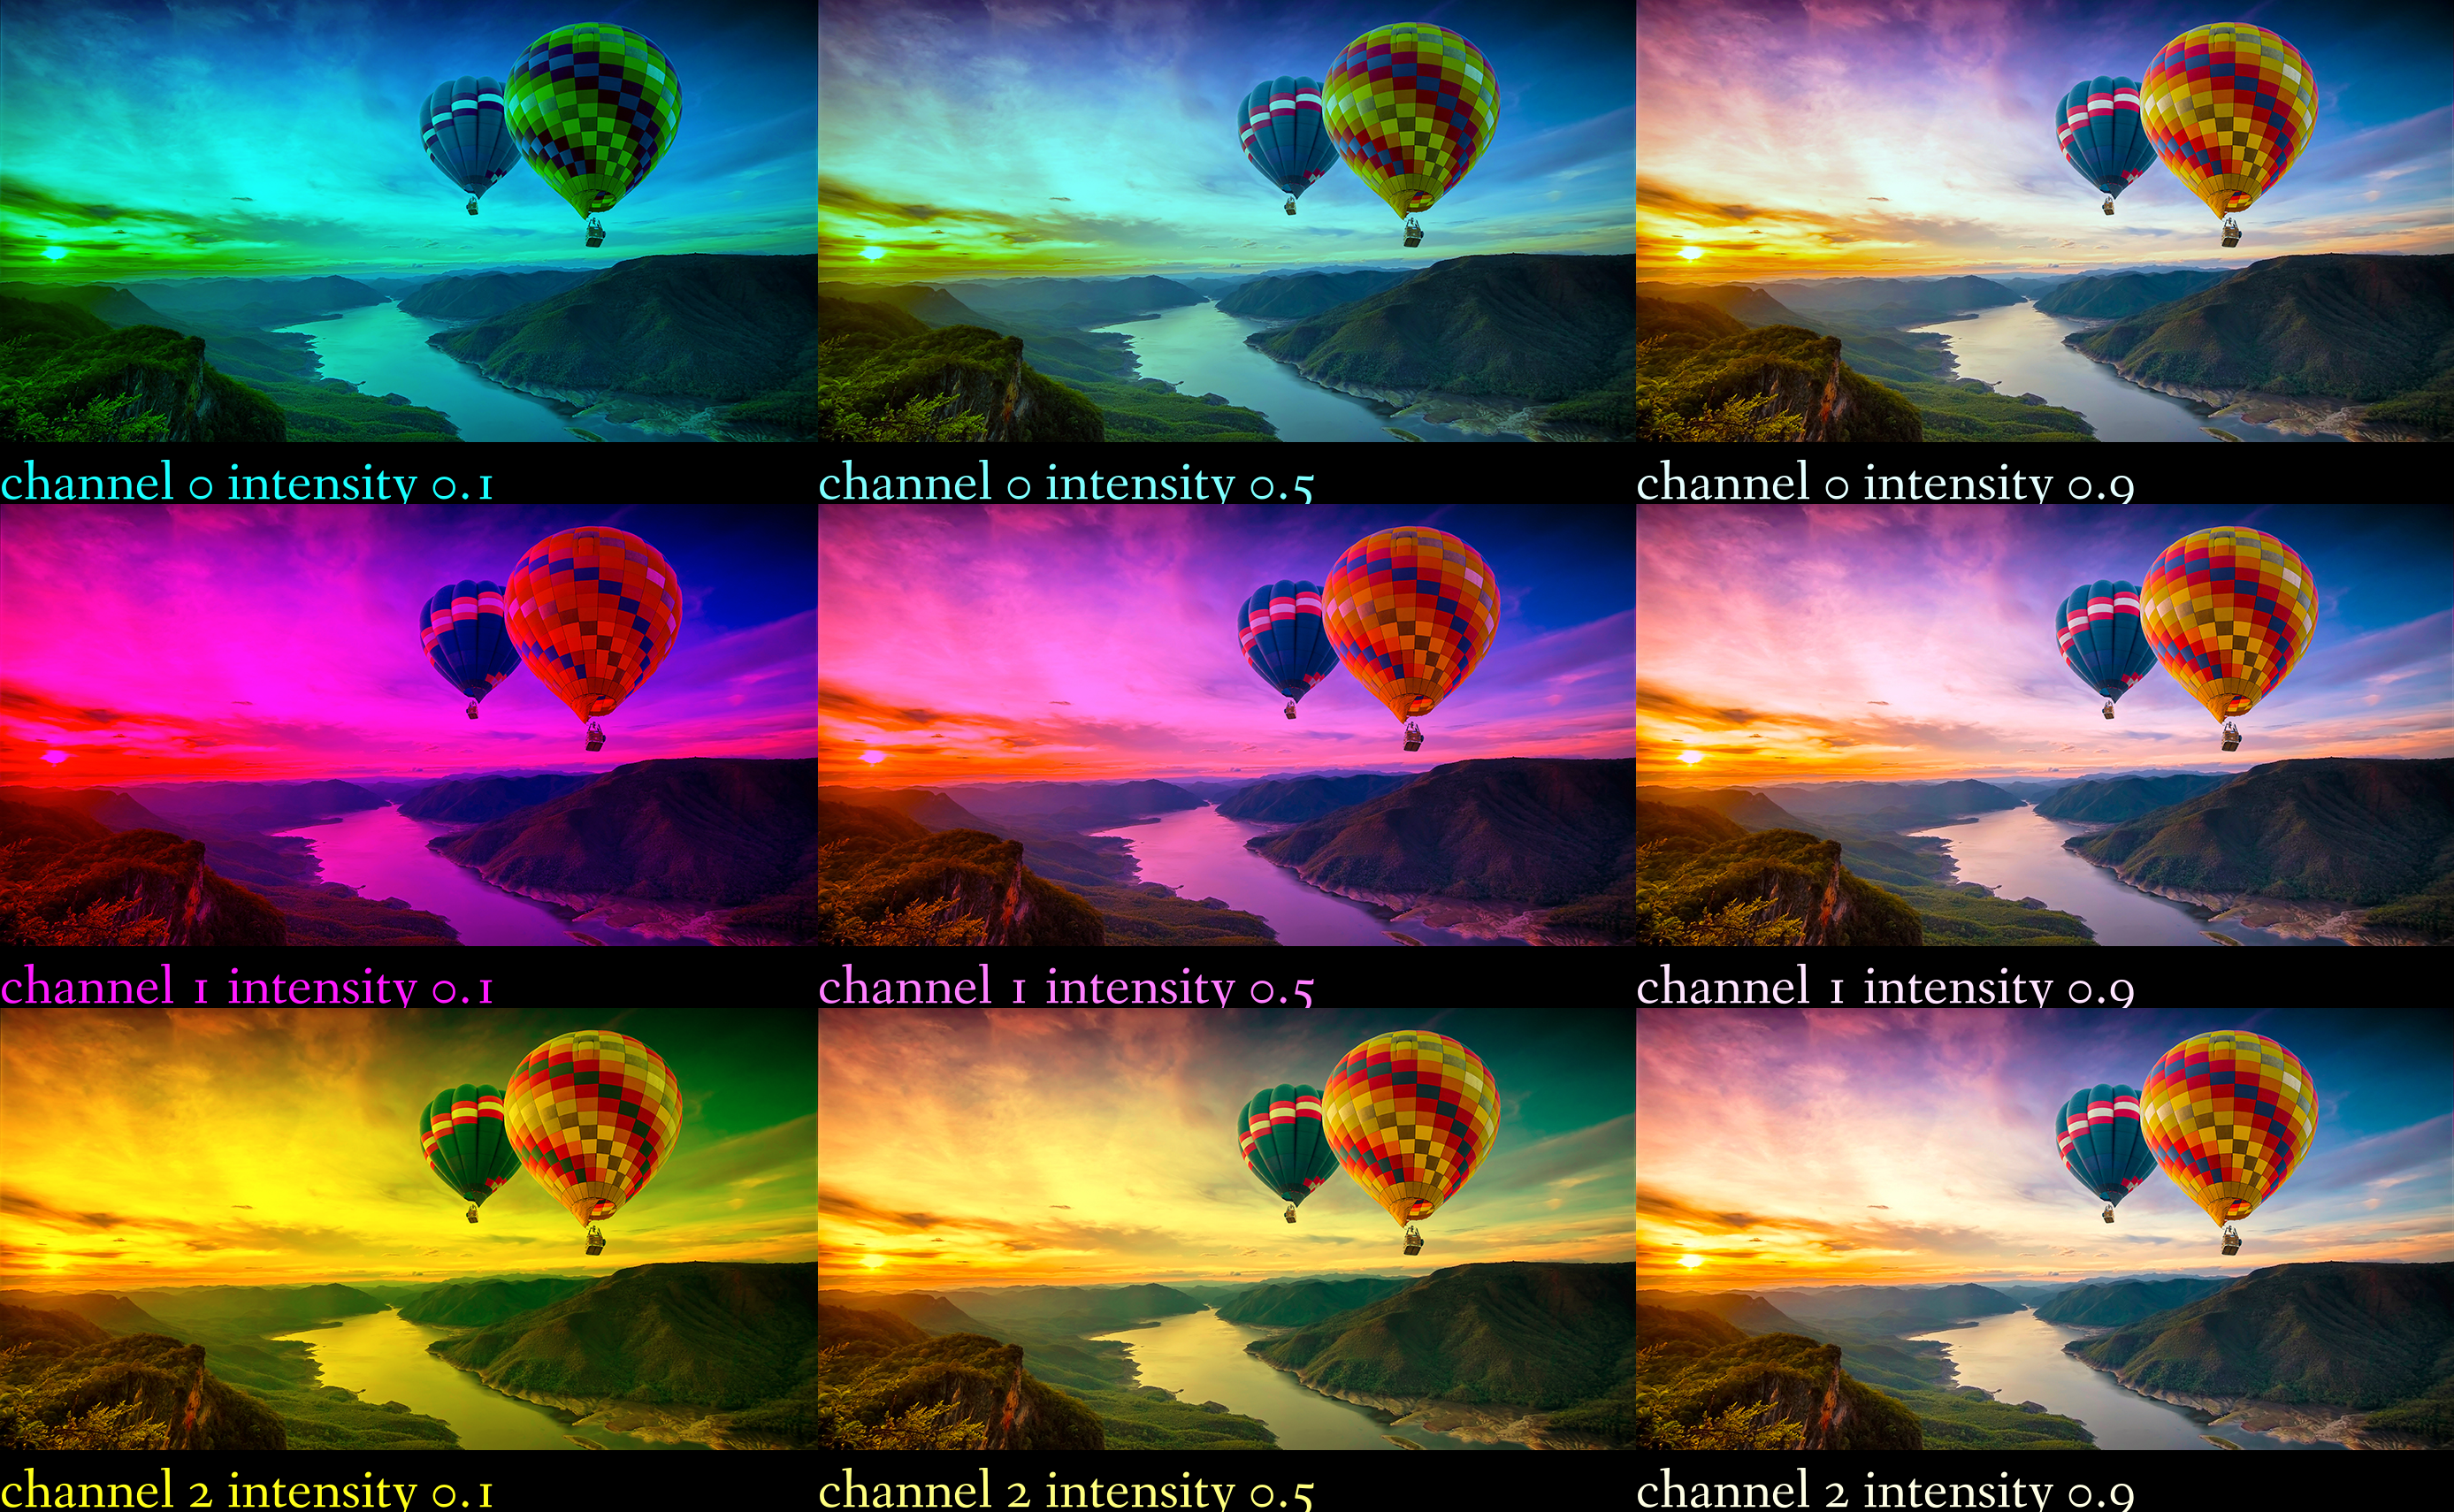

In [5]:
import PIL
from PIL import Image, ImageFont, ImageDraw

#Opening Image
image = Image.open("image.jpg")
# height of new image with 70 px bottom border
hn=image.height+70
h=image.height
w=image.width
images=[]
#list of intesties
intensity=[0.1,0.5,0.9]
font = ImageFont.truetype(r'font.ttf', 65)
for a in range(0,3):
    for c in range(0,3):
        #Creating new template of blackbackground
        img=Image.new('RGB',(w,hn),'black')
        #pasting original Image
        img.paste(image,(0,0))
        #drawing of image
        draw = ImageDraw.Draw(img)
        #text to be written at bottom of image
        text = f'channel {a} intensity {intensity[c]}'
        #writing text at bottom of image
        draw.text((0, h+5), text, font=font, align="left")
        #loading image to get pixels
        pixels = img.load()
        for i in range(img.size[0]):
            for j in range(img.size[1]):
                pix=img.getpixel((i,j))
                #creating a list of pixels
                li=[pix[0],pix[1],pix[2]]
                li[a]=li[a]*intensity[c]
                pixels[i, j] = (int(li[0]),int(li[1]),int(li[2]))
        images.append(img)
first_image=images[0]
#creating contact Sheet
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0
for img in images:
    contact_sheet.paste(img, (x, y) )
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width
#displaying image
display(contact_sheet)